In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#!ln -s /content/drive/My\ Drive/ /CarImages
#!ls /CarImages/CarImages/

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/CarImages/

131.jpg  676.jpg	LicensePlateData.csv  trCar3.jpg
141.jpg  bike2.jpg	LP2.mp4		      trCar4.jpeg
151.jpg  bike.jpg	LP.mp4		      video1.mp4
161.jpg  car1.png	mehran.jpg	      video.MOV
171.jpg  carimage2.jpg	traffic1.jpg	      yolov3.cfg
181.jpg  carimage.jpg	traffic.png	      yolov3_testing.cfg
444.jpg  classes.names	trCar1.jpeg	      yolov3_training_final.weights
454.jpg  coco.names	trCar2.jpeg	      yolov3.weights


## License Plate Detection Using YOLOv3

---



## Importing Libraries and Install Requirements

In [ ]:
pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=9d28ad5b9a14f0f6039bc2af8c90c40fbe69ca9e10a4f8e488e9981a2f71416b
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [ ]:
pip install tesseract-ocr

  ERROR: Failed building wheel for tesseract-ocr
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
    Running setup.py install for tesseract-ocr ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-x40doxh0/tesseract-ocr/setup.py'"'"'; __file__='"'"'/tmp/pip-install-x40doxh0/tesseract-ocr/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-7472t409/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [ ]:
pip install easyocr

     |████████████████████████████████| 62.4MB 50kB/s 




---





---





---



# Combined Detection

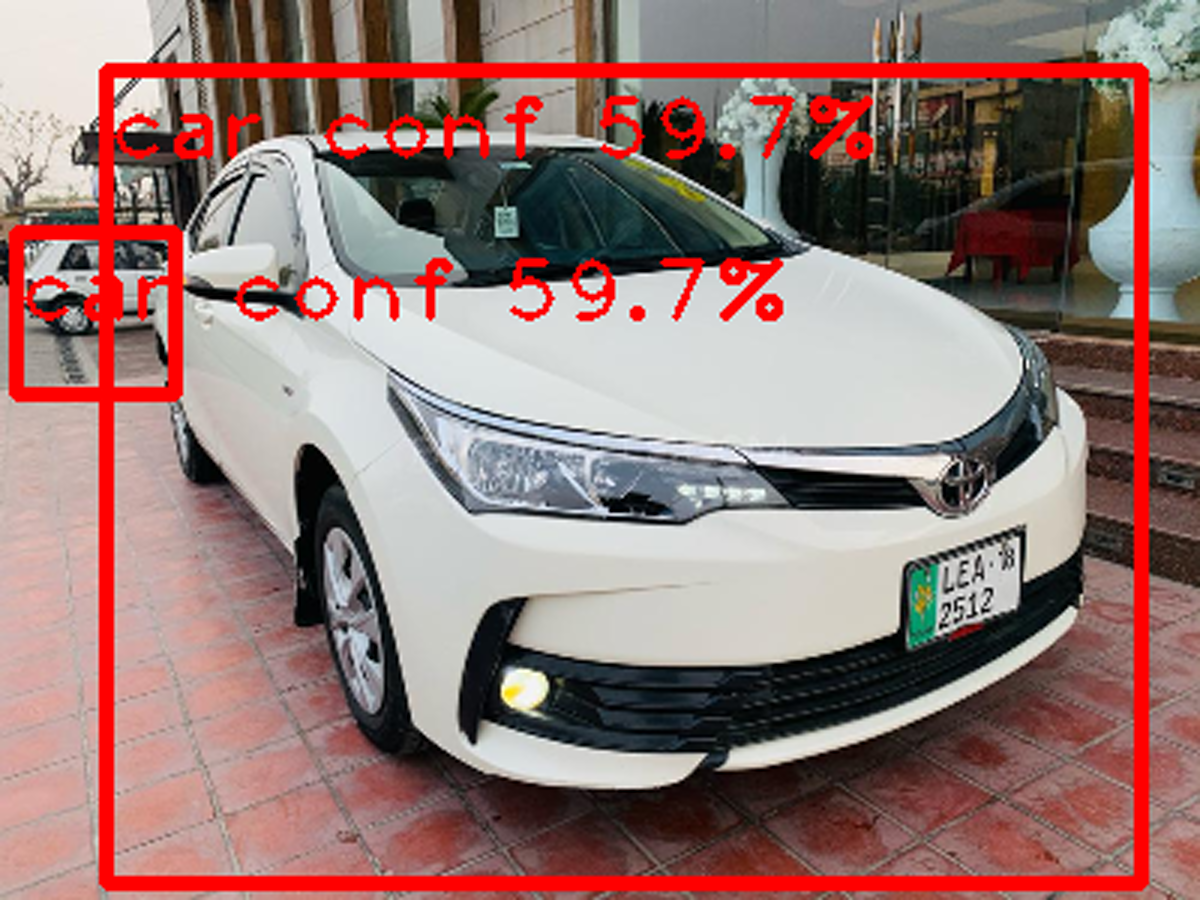

Plate is Not Detected Use Some Other Image


In [ ]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
import pandas as pd
import glob
import random
import pytesseract
try:
 from PIL import Image
except ImportError:
 import Image
#Only for Google Colab
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

#For spyder:
#pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

#Only For Google Colab
from google.colab.patches import cv2_imshow

#def readImage(img):
def checkRecord(licensePlateNo):
  licensePlateNo = np.array(licensePlateNo)
  licensePlateNo = licensePlateNo.flatten()
  if len(licensePlateNo) > 1:
    print(licensePlateNo)
    InfoData = pd.read_csv('/content/drive/MyDrive/CarImages/LicensePlateData.csv')
          # #InfoData = InfoData.to_numpy()
          #print(InfoData)
          # #print(licensePlateNo[0])
          # #ownerInfoIndex = np.where(InfoData==licensePlateNo[0])
          # #for i in range(0,5):
          # #print(InfoData[ownerInfoIndex])
    OwnerData = InfoData.loc[InfoData['License Plate No'] == licensePlateNo[0]]
    if OwnerData.empty:
      print("======================================================================")
      print("No Data Found Against Registration Number := ", licensePlateNo[0])
    else:
      print("======================================================================")
      print(OwnerData)
  else:
    print("Registraion Plate is Not Readable By EASYOCR!!!!")

def objectDetector(img_path):
  # #### Load Yolo
  path = "/content/drive/MyDrive/ObjectDetection/"
  net = cv2.dnn.readNet(path+"yolov3.weights", path+"yolov3.cfg")
  filter_classes = ["motorbike","bus","truck","car"]
  classes = []
  with open(path+"coco.names", "r") as f:
      classes = [line.strip() for line in f.readlines()]

  # Load Yolo Custom
  net_custom = cv2.dnn.readNet("/content/drive/MyDrive/yolov3_training_final.weights", "/content/drive/MyDrive/yolov3_testing.cfg")

  # Name custom object
  classes_custom = ["Reg_Num_Plate"]

  # Images path
  images_path = glob.glob(img_path)





  layer_names = net.getLayerNames()
  output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
  colors = np.random.uniform(0, 255, size=(len(classes), 3))

  layer_names_custom = net_custom.getLayerNames()
  output_layers_custom = [layer_names_custom[i[0] - 1] for i in net_custom.getUnconnectedOutLayers()]
  colors_custom = np.random.uniform(0, 255, size=(len(classes_custom), 3))




  # Insert here the path of your images
  random.shuffle(images_path)




  # loop through all the images
  for img_path in images_path:
      # Loading image
      img = cv2.imread(img_path)
      img = cv2.resize(img, None, fx=0.4, fy=0.4)
      height, width, channels = img.shape

      # Detecting objects
      blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

      net.setInput(blob)
      outs = net.forward(output_layers)

      # Showing informations on the screen
      class_ids = []
      confidences = []
      boxes = []
      noCar = np.zeros((120,120,3))
      for out in outs:
          for detection in out:
              scores = detection[5:]
              class_id = np.argmax(scores)
              confidence = scores[class_id]
              if confidence > 0.5:
                  Veh_Acc = confidence
                  # Object detected
                  #print("Vehicle Score: ",confidence)
                  center_x = int(detection[0] * width)
                  center_y = int(detection[1] * height)
                  w = int(detection[2] * width)
                  h = int(detection[3] * height)

                  # Rectangle coordinates
                  x = int(center_x - w / 2)
                  y = int(center_y - h / 2)

                  boxes.append([x, y, w, h])
                  confidences.append(float(confidence))
                  class_ids.append(class_id)
            
                

      indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
      #print(indexes)
      vehDet = False
      font = cv2.FONT_HERSHEY_PLAIN
      for i in range(len(boxes)):
          if i in indexes:
              x, y, w, h = boxes[i]
              label = str(classes[class_ids[i]])
              color = colors[class_ids[i]]
              if label == "car" or label == "bike":
                vehDet = True
                if label == filter_classes[0]:
                  color = (255,0,0)
                elif label == filter_classes[3]:
                  color = (0,0,255)
                cv2.rectangle(img, (x, y), (x + w, y + h+20), color, 3)
                cv2.putText(img, label+" conf "+str(round(Veh_Acc*100,2))+"%", (x, y + 30), font, 2, color, 2)
              
              
                
              if vehDet: 
                net_custom.setInput(blob)
                outs = net_custom.forward(output_layers_custom)

                # Showing informations on the screen
                class_ids_custom = []
                confidences_custom = []
                boxes_custom = []
                plateDet = False
                for out in outs:
                    for detection in out:
                        scores = detection[5:]
                        class_id = np.argmax(scores)
                        confidencePlate = scores[class_id]
                        if confidencePlate > 0.5:
                            acc = confidencePlate
                            plateDet = True
                            # Object detected
                            #print("Plate Score: ",acc)
                            center_x = int(detection[0] * width)
                            center_y = int(detection[1] * height)
                            w = int(detection[2] * width)
                            h = int(detection[3] * height)

                            # Rectangle coordinates
                            x = int(center_x - w / 2)
                            y = int(center_y - h / 2)

                            boxes_custom.append([x, y, w, h])
                            confidences_custom.append(float(confidencePlate))
                            class_ids_custom.append(class_id)
                            plate = img[y:y+h+2, x:x+w-3]
                            
                colorBlue = (255,0,0)
                indexes_custom = cv2.dnn.NMSBoxes(boxes_custom, confidences_custom, 0.5, 0.4)
                #print(indexes_custom)
                noPlate = np.zeros((120,120,3))
                font = cv2.FONT_HERSHEY_PLAIN
                for i in range(len(boxes_custom)):
                    if i in indexes_custom:
                        
                        x, y, w, h = boxes_custom[i]
                        label = str(classes_custom[class_ids_custom[i]])
                        cv2.rectangle(img, (x, y), (x + w, y + h+2), colorBlue, 3)
                        cv2.putText(img, "Reg# Conf: "+str(round(acc*100,2))+"%", (x-30, y - 5), font, 2, colorBlue, 2)
              else:
                print("Plate is Not Detected")
                plateDet = False
      if vehDet == False:
          print("Vehicle is Not Detected, Use Next Image")    
      #---------------------------------------------------------------------------
      
  if vehDet:    
    if plateDet:           
      return img, plate, acc
    else:
      return img, noPlate, 0
  else:
    return img, noCar, -1

"""
cap = cv2.VideoCapture("/content/drive/MyDrive/video1.mp4")
ret, frame = cap.read()
height,width,layers=frame.shape 

fourcc = cv2.VideoWriter_fourcc(*'XVID') 
video = cv2.VideoWriter('/content/drive/MyDrive/output.avi', fourcc, 20.0, (width, height)) 
frame_counter = 0
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    output_img, plate = objectDetector(frame)
    frame_counter += 1
    if ret == True:
      
    #output_img = output_img[460:790, 500:850]
      video.write(output_img)
      
      if plate.shape < output_img.shape:
        print("Processing....", frame_counter)
        #Only For COLAB
        #cv2_imshow(output_img)
        #cv2_imshow(plate)
        cv2.imshow(output_img)
        cv2.imshow(plate)
        reader = easyocr.Reader(['en'])
        result = reader.readtext(plate)
        #print(result)
        #print(len(result))

        licensePlateNo = []
        if len(result) == 3:
          temp = [str(result[0][1]+result[2][1]),str(result[1][1])]
          licensePlateNo.append(temp)
        elif len(result) == 2:
          #temp = [str(result[0][1]+result[1][1]),str("N/A")]
          #licensePlateNo.append(temp)
          continue
        elif len(result) == 1:
          continue
        else:
          continue
        checkRecord(licensePlateNo)
        #break
    #if cv2.waitKey(1) & 0xFF == ord('q'):
        #break

# # When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
video.release()
"""




input_image_path = r"/content/drive/MyDrive/CarImages/image1.jpg"
# cropped = input_image[440:850, 510:850]
# cv2.imshow('Cropped',cropped)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

image, plateImage, conf = objectDetector(input_image_path)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

#print(image.shape)
#print(plateImage.shape)


#CoLAB ONLY

#cv2_imshow(plateImage)




#plateImage = cv2.cvtColor(plateImage, cv2.COLOR_BGR2RGB)

if conf > 0.5:
  fig = plt.gcf()
  fig.set_size_inches(8, 10)
  plt.axis("off")
  cv2_imshow(resized_image)
  #plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

  plt.imshow(cv2.cvtColor(plateImage, cv2.COLOR_BGR2RGB))
  plt.show()
  #regNumber = pytesseract.image_to_string(plateImage, lang='eng', config='-psm 1')
  #print("Registration No From PYTESSARECT: ", regNumber)
  reader = easyocr.Reader(['en'])
  result = reader.readtext(plateImage)
  print("Registration No From EASYOCR: ", result)
  print(len(result))
  licensePlateNo = []
  if len(result) == 3:
    temp = [str(result[0][1]+result[2][1]),str(result[1][1])]
    licensePlateNo.append(temp)
  elif len(result) == 2:
    temp = [str(result[0][1]+result[1][1]),str("N/A")]
    licensePlateNo.append(temp)
  else:
    licensePlateNo.append("Not Correctly Detected")
  checkRecord(licensePlateNo)
elif conf == 0:
  cv2_imshow(resized_image)
  print("Plate is Not Detected Use Some Other Image")
elif conf == -1:
  cv2_imshow(resized_image)
  




#plateImage = cv2.cvtColor(plateImage, cv2.COLOR_BGR2GRAY)
#(thresh, plateImage) = cv2.threshold(plateImage, 135, 255, cv2.THRESH_BINARY)

#plateImage = cv2.bitwise_not(plateImage)


#cv2.imshow('Detected',resized_image)

#cv2.imwrite("/content/drive/MyDrive/121.png", plateImage)



# # Reading Reg Number in Image

  





In [ ]:
def CalculateMAP(imgs):
  for img in imgs:
  image, plateImage, conf = objectDetector(img)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)


  #CoLAB ONLY

  #cv2_imshow(plateImage)


  print("---- Plate Confidence:",conf)

input_image_path = r"/content/drive/MyDrive/CarImages/trCar4.jpeg"
CalculateMAP(input_image_path)

Vehicle Score:  0.8313889
Vehicle Score:  0.5574561
Plate Score:  0.9976221
(295, 512, 3)
(38, 74, 3)
---- Plate Confidence: 0.9976221
